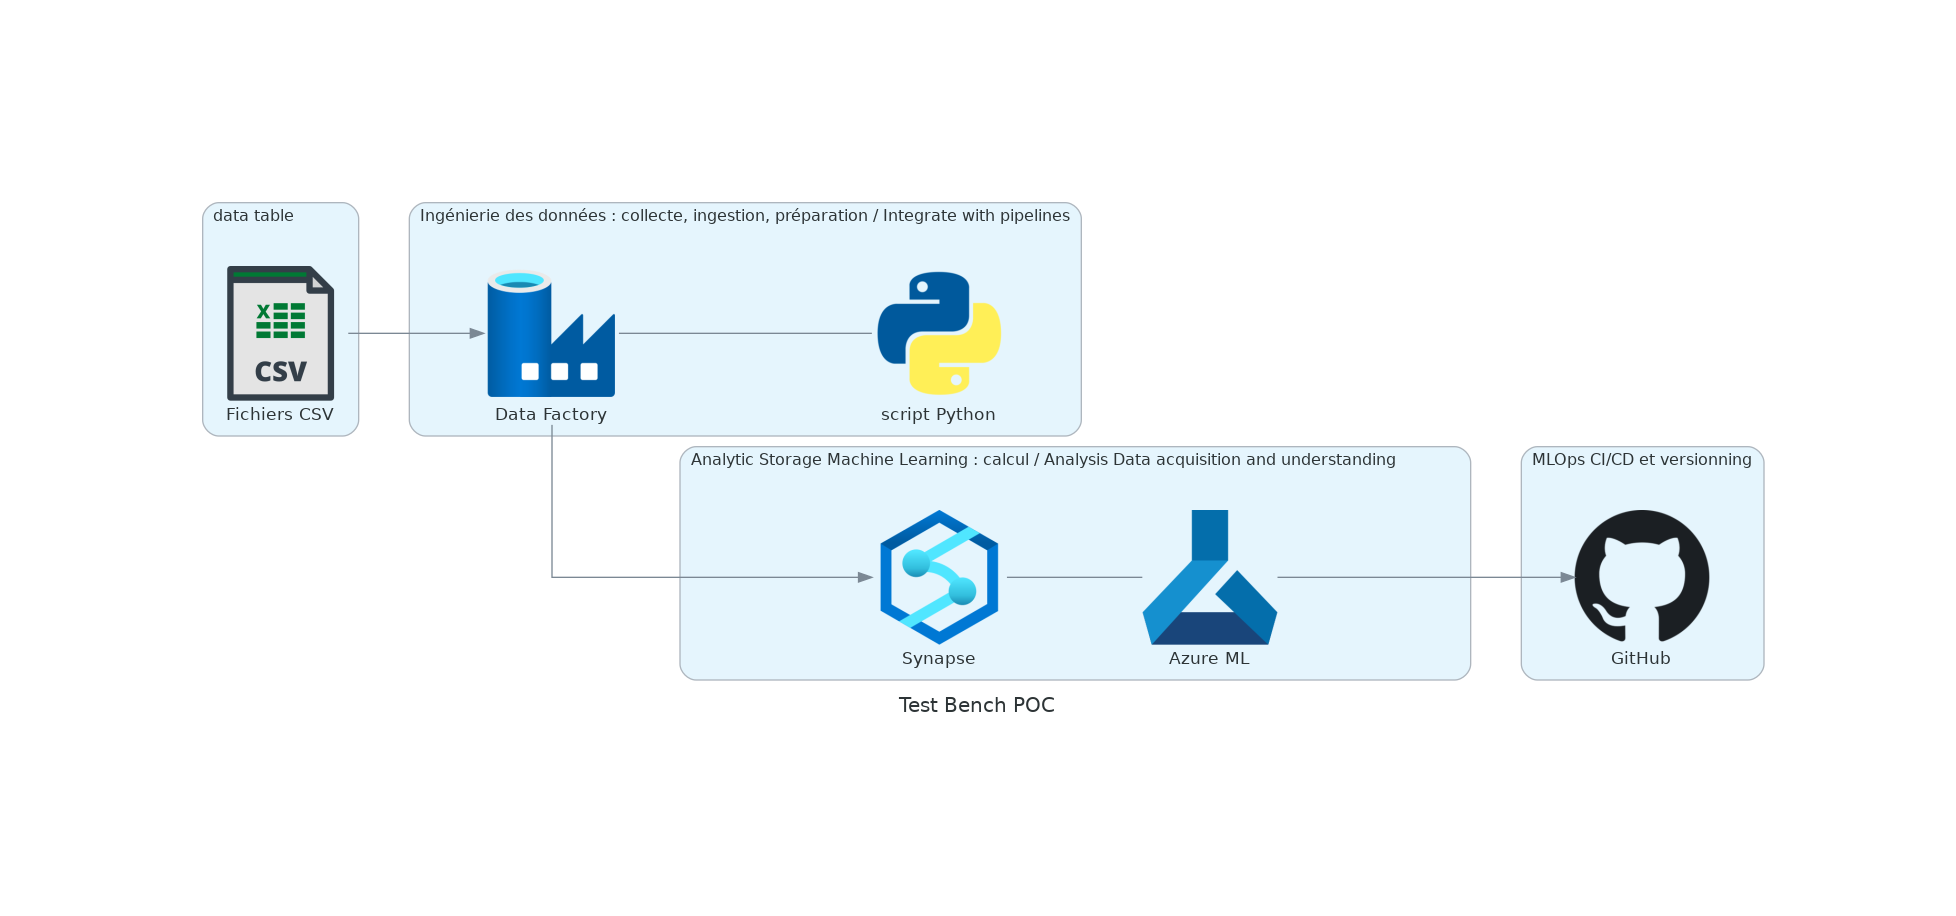

In [24]:
from diagrams import Cluster, Diagram
from diagrams.custom import Custom
from urllib.request import urlretrieve

from diagrams.azure.database import DataFactory
from diagrams.azure.analytics import EventHubs
from diagrams.azure.analytics import StreamAnalyticsJobs
from diagrams.azure.storage import DataLakeStorage

from diagrams.azure.analytics import Databricks
from diagrams.azure.ml import MachineLearningServiceWorkspaces

from diagrams.onprem.analytics import PowerBI
from diagrams.azure.analytics import SynapseAnalytics

from diagrams.onprem.vcs import Github
from diagrams.azure.compute import AKS

from diagrams.programming.language import Python

with Diagram("Test Bench POC", show=False) as diag:
    
    # Custom icons
    sensor_url = "https://cdn-icons-png.flaticon.com/512/2540/2540201.png"
    sensor_icon = "sensor.png"
    urlretrieve(sensor_url, sensor_icon)
    
    csvfile_url = "https://cdn-icons-png.flaticon.com/512/180/180855.png"
    csvfile_icon = "csvfile.png"
    urlretrieve(csvfile_url, csvfile_icon)
    
    deltalake_url = "https://camo.githubusercontent.com/5535944a613e60c9be4d3a96e3d9bd34e5aba5cddc1aa6c6153123a958698289/68747470733a2f2f646f63732e64656c74612e696f2f6c61746573742f5f7374617469632f64656c74612d6c616b652d77686974652e706e67"
    deltalake_icon = "deltalake.png"
    urlretrieve(deltalake_url, deltalake_icon)
    
    # Clusters
    #with Cluster("Déploiement"):
    #    aks = AKS("AKS")

    #with Cluster("MLOps CI/CD et versionning"):
    #   github = Github("GitHub")
    #   github >> aks

    #with Cluster("Insight"):
    #    powerBI = PowerBI("Power BI")
    with Cluster("MLOps CI/CD et versionning"):
        github = Github("GitHub")
        #github >> aks
        
    with Cluster("Analytic Storage Machine Learning : calcul / Analysis Data acquisition and understanding"):
        synapse = SynapseAnalytics("Synapse")
        azureML = MachineLearningServiceWorkspaces("Azure ML")
        synapse-azureML
        datafactory >> azureML
        azureML >> github 
        
    with Cluster("Ingénierie des données : collecte, ingestion, préparation / Integrate with pipelines"):
        #eventhubs = EventHubs('Event Hubs')
        #streamanal = StreamAnalyticsJobs("Stream Analytics")
        datafactory = DataFactory('Data Factory')
        python = Python("script Python")
        datafactory-python
        #eventhubs >> streamanal >> datalake
        datafactory >> synapse
        #eventhubs >> databricks

    with Cluster("data table"):
        # Custom("Capteurs", sensor_icon) >> eventhubs
        Custom("Fichiers CSV", csvfile_icon) >> datafactory

diag